In [1]:
import numpy as np
import cv2 as cv
from feature_description.sift_descriptor import SIFTDescriptor
from optical_flow.gu import Gu
from optical_flow.bounding_box import BoundingBox
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# video_path = "/workspaces/python-opencv/repo/videos/IMG_0165.MOV"
video_path = "/workspaces/python-opencv/repo/videos/jog.mp4"
# video_path = "/workspaces/python-opencv/repo/videos/slow_traffic_small.mp4"
out_path = "/workspaces/python-opencv/repo/out/gu_test.mp4"
target_size = (360, 640)[::-1]
# params = {"sigma" : 7, "nOctaveLayers":3} 
# params = {"sigma" : 7}
params = {"sigma": 4, "nOctaveLayers":3, "contrastThreshold":0.03, "edgeThreshold":10}
# target_size = (720, 1280)[::-1]
# params = {}

In [3]:
cap = cv.VideoCapture(video_path)
ret, frame = cap.read()
print(frame.shape)

# target_size = frame.shape[0:2][::-1]

blur = (1, 1)
# blur = (10, 10)
frame = cv.resize(frame, target_size, dst = frame)
frame = cv.blur(frame, blur)

# x, y, w, h = 350, 125, 250, 350
x, y, w, h = 645//2, 385//2, 40//2, 100//2
# x, y, w, h = 645, 385, 40, 100
# x, y, w, h = 645//2 + 5 , 385//2 + 12, 40//2 - 5, 100//2 - 20
# x, y, w, h = 300, 190, 100, 80
track_window = (x, y, w, h)

(720, 1280, 3)


In [4]:
fourcc = cv.VideoWriter_fourcc(*'mp4v')
video_out = cv.VideoWriter(out_path, fourcc, 30, target_size)

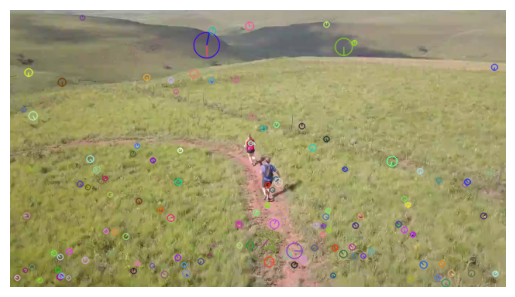

In [5]:
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create(**params)
kp = sift.detect(gray,None)


test_frame = cv.drawKeypoints(frame, kp, None, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
fig, ax = plt.subplots(figsize=(test_frame.shape[1] / 100, test_frame.shape[0] / 100))
plt.imshow(test_frame[:, :, ::-1])

ax.set_aspect('auto')

ax.axis('off')
plt.show()

In [6]:
bbox = BoundingBox(x, y, w, h)
descriptor = SIFTDescriptor(params=params)

In [7]:
img2 = cv.rectangle(test_frame, (x, y),  (x + w, y + h), 255, 2)
video_out.write(img2)

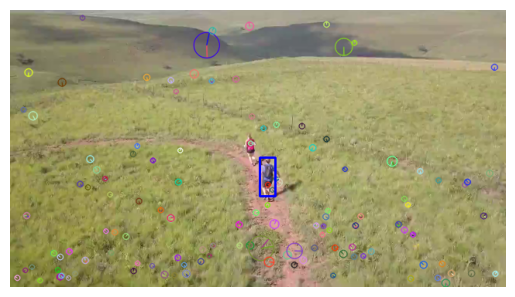

In [8]:
fig, ax = plt.subplots(figsize=(test_frame.shape[1] / 100, test_frame.shape[0] / 100))
plt.imshow(img2[:, :, ::-1])

ax.set_aspect('auto')

ax.axis('off')
plt.show()

In [9]:
gu = Gu(frame, bbox, descriptor, s= 100)

In [10]:
gu._compute_kappa(bbox, bbox)

np.float64(0.0)

In [11]:
gu.track_frame(frame)

(BoundingBox(x=321, y=191, w=21, h=51), np.float64(-2.0))

In [12]:
for i in tqdm(range(150)):
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = cv.resize(frame, target_size, dst = frame)
    frame = cv.blur(frame, blur)
    
    my_bbox, _ = gu.track_frame(frame)

    frame2 = cv.rectangle(frame, (my_bbox.x, my_bbox.y), (my_bbox.x + my_bbox.w, my_bbox.y + my_bbox.h), 255, 2)
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    kp = sift.detect(gray, None)
    frame2 = cv.drawKeypoints(frame2, kp, None, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    video_out.write(frame2)

100%|██████████| 150/150 [01:49<00:00,  1.37it/s]


In [13]:
cap.release()
video_out.release()
cv.destroyAllWindows()